**Computational Models for Complex Systems Project - University of Pisa**

**Authors**: Giulia Ghisolfi

# Protein Synthesis Simulation

Load dataset:

In [1]:
from HumanGenomeDataset.load_dataset import load_dataset

data_df = load_dataset('dna_protein_coding_sequences')
data_df.head(2)

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,ID,sequence,category
0,NM_001368254.1,GCTGAGCTGAGCTGGGGCGCAGCCGCCTGTCTGCACCGGCAGCACC...,NM
1,NM_001350977.1,TCCACAACTGAAACATCCACTTCTGAACACCATGTCCTACTACAGC...,NM


### Simulation

In [2]:
from src.simulation import ProteinSinthesisProcess

Load parameters:

In [3]:
import json

parameters_path_1 = 'data/parameters_ribosome.json'
parameters_1 = json.load(open(parameters_path_1, 'r'))

parameters_path_2 = 'data\parameters_rna_polymerases.json'
parameters_2 = json.load(open(parameters_path_1, 'r'))

In [4]:
from itertools import product

parameters_sets = list(product(*parameters_1.values())) + list(product(*parameters_2.values()))
TEST_NAME = 'models_comparison_'

Start simulation:

In [5]:
for i, set in enumerate(parameters_sets):
    ps = ProteinSinthesisProcess(data_df, *set[1:])

    print(f'Starting simulation of test set {i}')
    print(ps)
    ps.run(simulation_time=set[0]) # run the simulation

    ps.save_process(folder_test_name=TEST_NAME+f'{i}') # save the process
    
    # save the parameters
    with open(f'results/'+TEST_NAME+f'{i}/parameters.json', 'w') as f:
        json.dump({k: v for k, v in zip(parameters_1.keys(), set)}, f)
    
    print(f'Finished test: {i+1}/{len(parameters_sets)}\n')

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 0
Protein Sinthesis Process:
185310 dna sequences to synthesize,
10 resources available,
10 RNA polymerases,
2 ribosomes,
50000.0 uracil bases,
50000.0 adenine bases,
50000.0 guanine bases,
50000.0 cytosine bases.
Simulation started
End simulation: 431 proteins synthesized from 36 DNA sequences.
Process saved.
Finished test: 1/6

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 1
Protein Sinthesis Process:
185310 dna sequences to synthesize,
10 resources available,
10 RNA polymerases,
50 ribosomes,
50000.0 uracil bases,
50000.0 adenine bases,
50000.0 guanine bases,
50000.0 cytosine bases.
Simulation started
End simulation: 1602 proteins synthesized from 129 DNA sequences.
Process saved.
Finished test: 2/6

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 2
Protein Sinthesis Process:
185310 dna sequences t

### Results

In [6]:
from src.utils.plot_utils import *
import pandas as pd

In [7]:
results_df_list = []
rna_polymerase_dict_list = []
ribosome_dict_list = []
parameters_dict_list = []

for i in range(len(parameters_sets)):
    results_df = pd.read_csv(f'results/'+TEST_NAME+f'{i}/results.csv', index_col=0)
    results_df_list.append(results_df)
    with open(f'results/'+TEST_NAME+f'{i}/rna_polymerase_history.json', 'r') as f:
        rna_polymerase_dict_list.append(json.load(f))
    with open(f'results/'+TEST_NAME+f'{i}/ribosome_history.json', 'r') as f:
        ribosome_dict_list.append(json.load(f))
    with open(f'results/'+TEST_NAME+f'{i}/parameters.json', 'r') as f:
        parameters_dict_list.append(json.load(f))

In [8]:
display(create_model_df(parameters_dict_list))

,simulation_time,number_resources,number_rna_polymerases,number_ribosomes,number_rna_transfers_per_codon,uracil_initial_amount,adenine_initial_amount,guanine_initial_amount,cytosine_initial_amount,random_seed,verbose
0,3600,10,10,2,10000.0,50000.0,50000.0,50000.0,50000.0,None,False
1,3600,10,10,50,10000.0,50000.0,50000.0,50000.0,50000.0,None,False
2,3600,10,10,10,10000.0,50000.0,50000.0,50000.0,50000.0,None,False
3,3600,10,10,2,10000.0,50000.0,50000.0,50000.0,50000.0,None,False
4,3600,10,10,50,10000.0,50000.0,50000.0,50000.0,50000.0,None,False
5,3600,10,10,10,10000.0,50000.0,50000.0,50000.0,50000.0,None,False


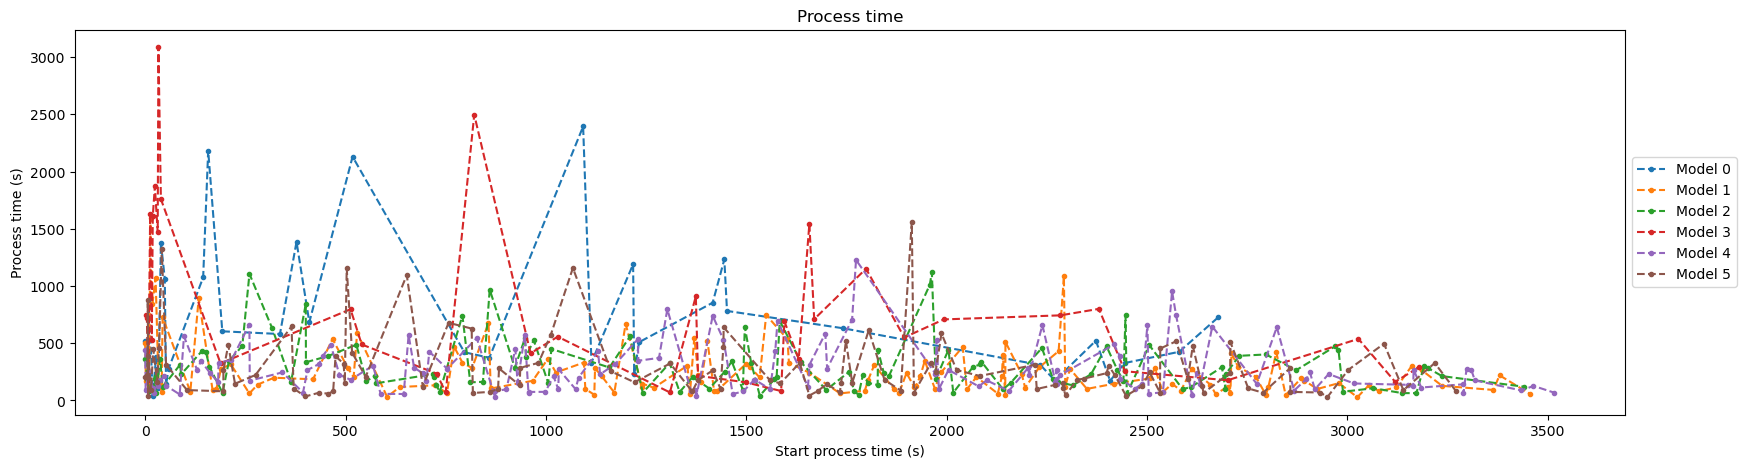

In [9]:
compare_process_time(results_df_list)

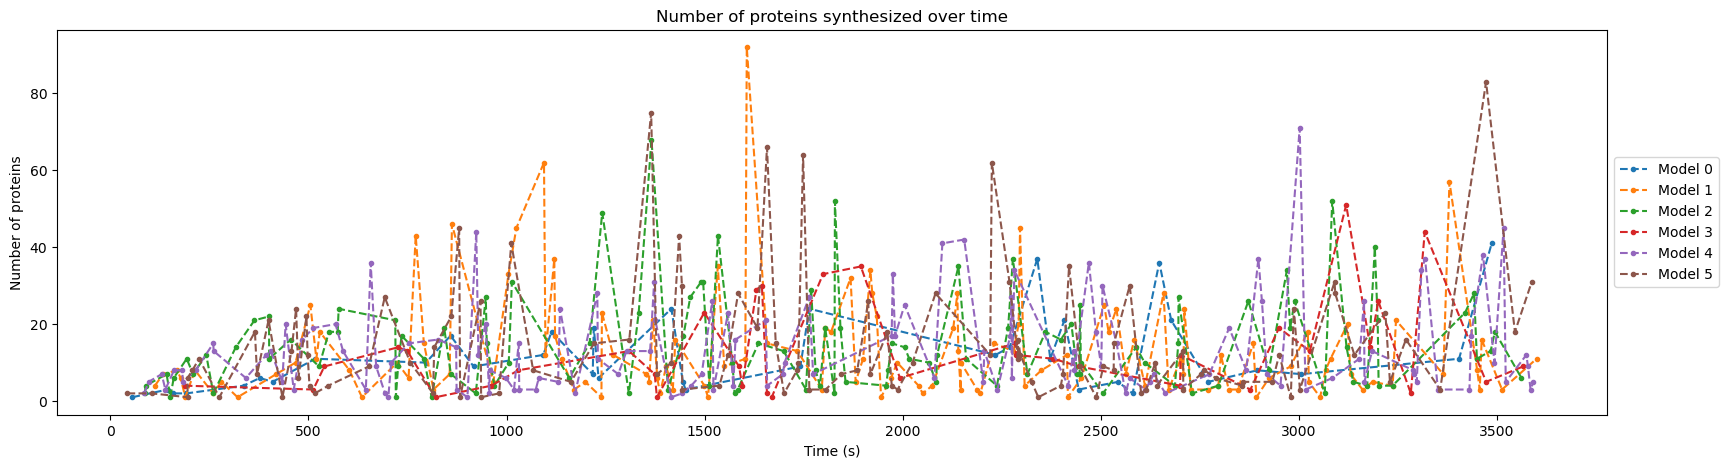

In [10]:
compare_proteins_number_over_time(results_df_list)

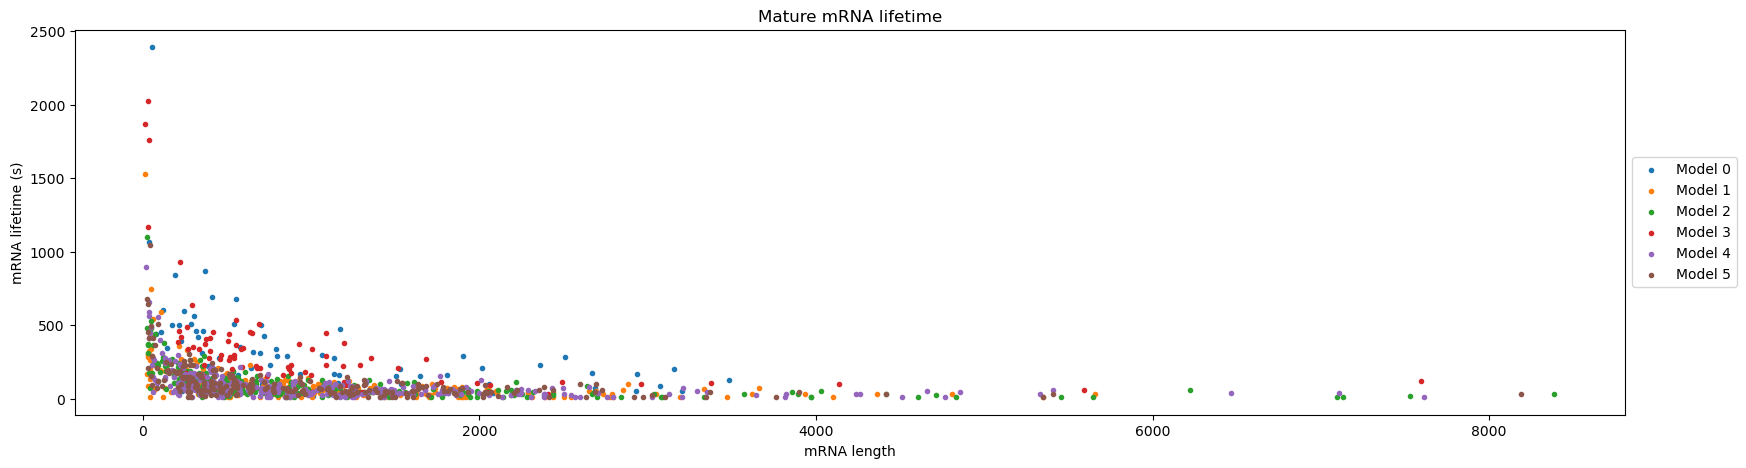

In [11]:
compare_mrna_lifetime(results_df_list)

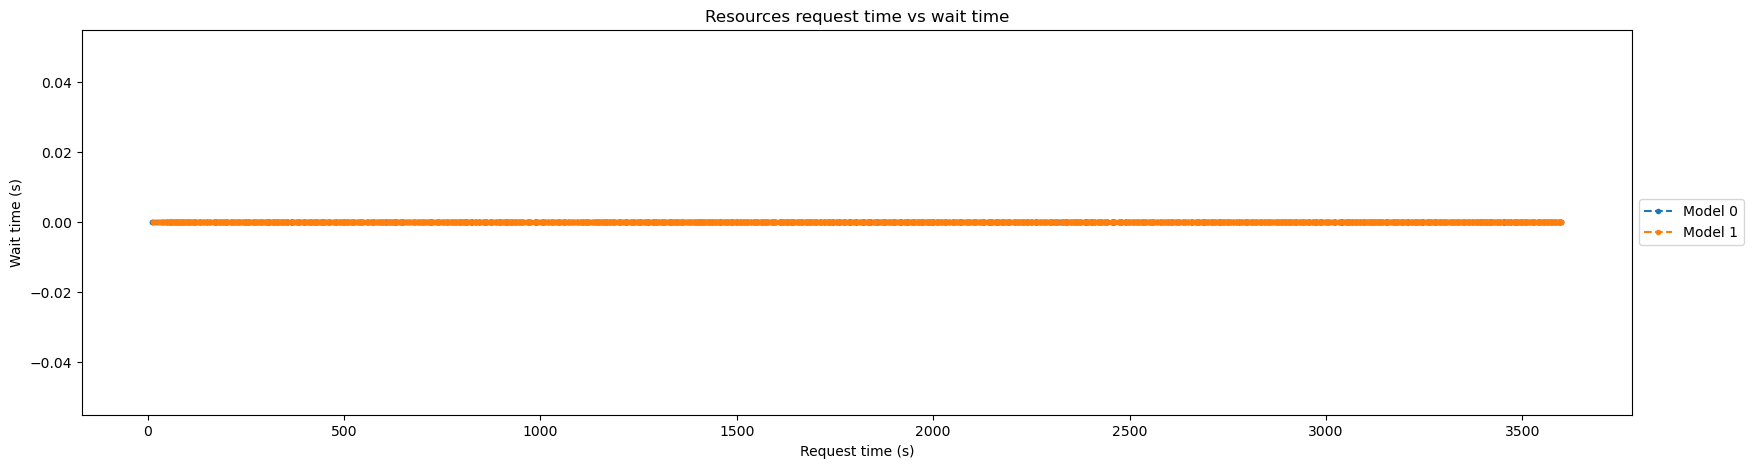

In [12]:
compare_wait_time(ribosome_dict_list[4:])

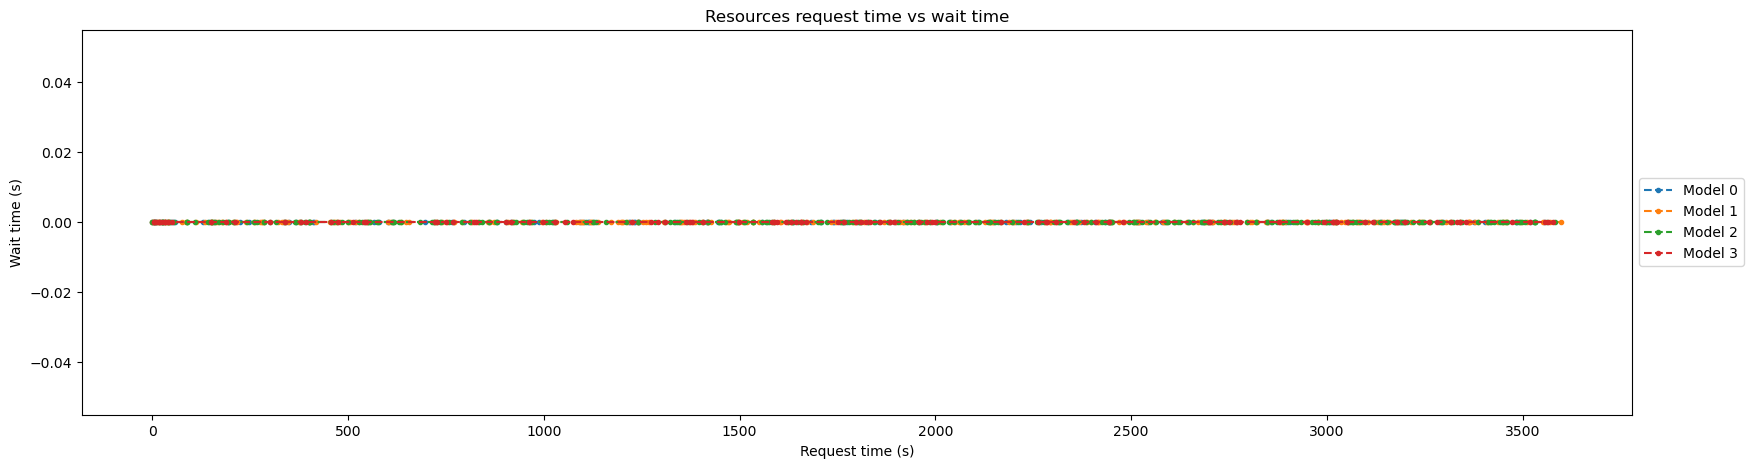

In [13]:
compare_wait_time(rna_polymerase_dict_list[:4])